# Análisis Exploratorio de Datos (EDA) del Dataset de Homicidios en Siniestros Viales
Este análisis tiene como objetivo explorar el dataset proporcionado para entender mejor los factores que contribuyen a los homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires durante el periodo 2016-2021. Los pasos del análisis incluyen:
1. Descripción general del dataset.
2. Búsqueda de valores faltantes, valores atípicos y registros duplicados.
3. Estadísticas descriptivas.
4. Análisis de tendencias temporales.
5. Análisis geográfico de los siniestros.
6. Identificación de patrones en los participantes de los accidentes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
from datetime import datetime
from IPython.display import display

In [2]:
file_path_homicidios = '../Datasets/homicidios.xlsx'
homicidios_hechos = pd.read_excel(file_path_homicidios, sheet_name='HECHOS')
homicidios_victimas = pd.read_excel(file_path_homicidios, sheet_name='VICTIMAS')

## Descripción General del Dataset
El dataset contiene información sobre los hechos y las víctimas de homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires. A continuación, se muestra una vista general de los datos cargados:

In [3]:
display(homicidios_hechos.head())
display(homicidios_victimas.head())

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


## Exploración de Nulos
Ver estadísticas resumidas de los datos

In [4]:
homicidios_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [5]:
homicidios_victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


Ver información sobre los datos, incluidos los recuentos no nulos

In [6]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [7]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Resumen del número de nulos

In [8]:
homicidios_hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [9]:
homicidios_victimas.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

## Búsqueda de Valores Faltantes
Es importante identificar y manejar los valores faltantes en el dataset. Utilizamos `missingno` para visualizar los valores faltantes.

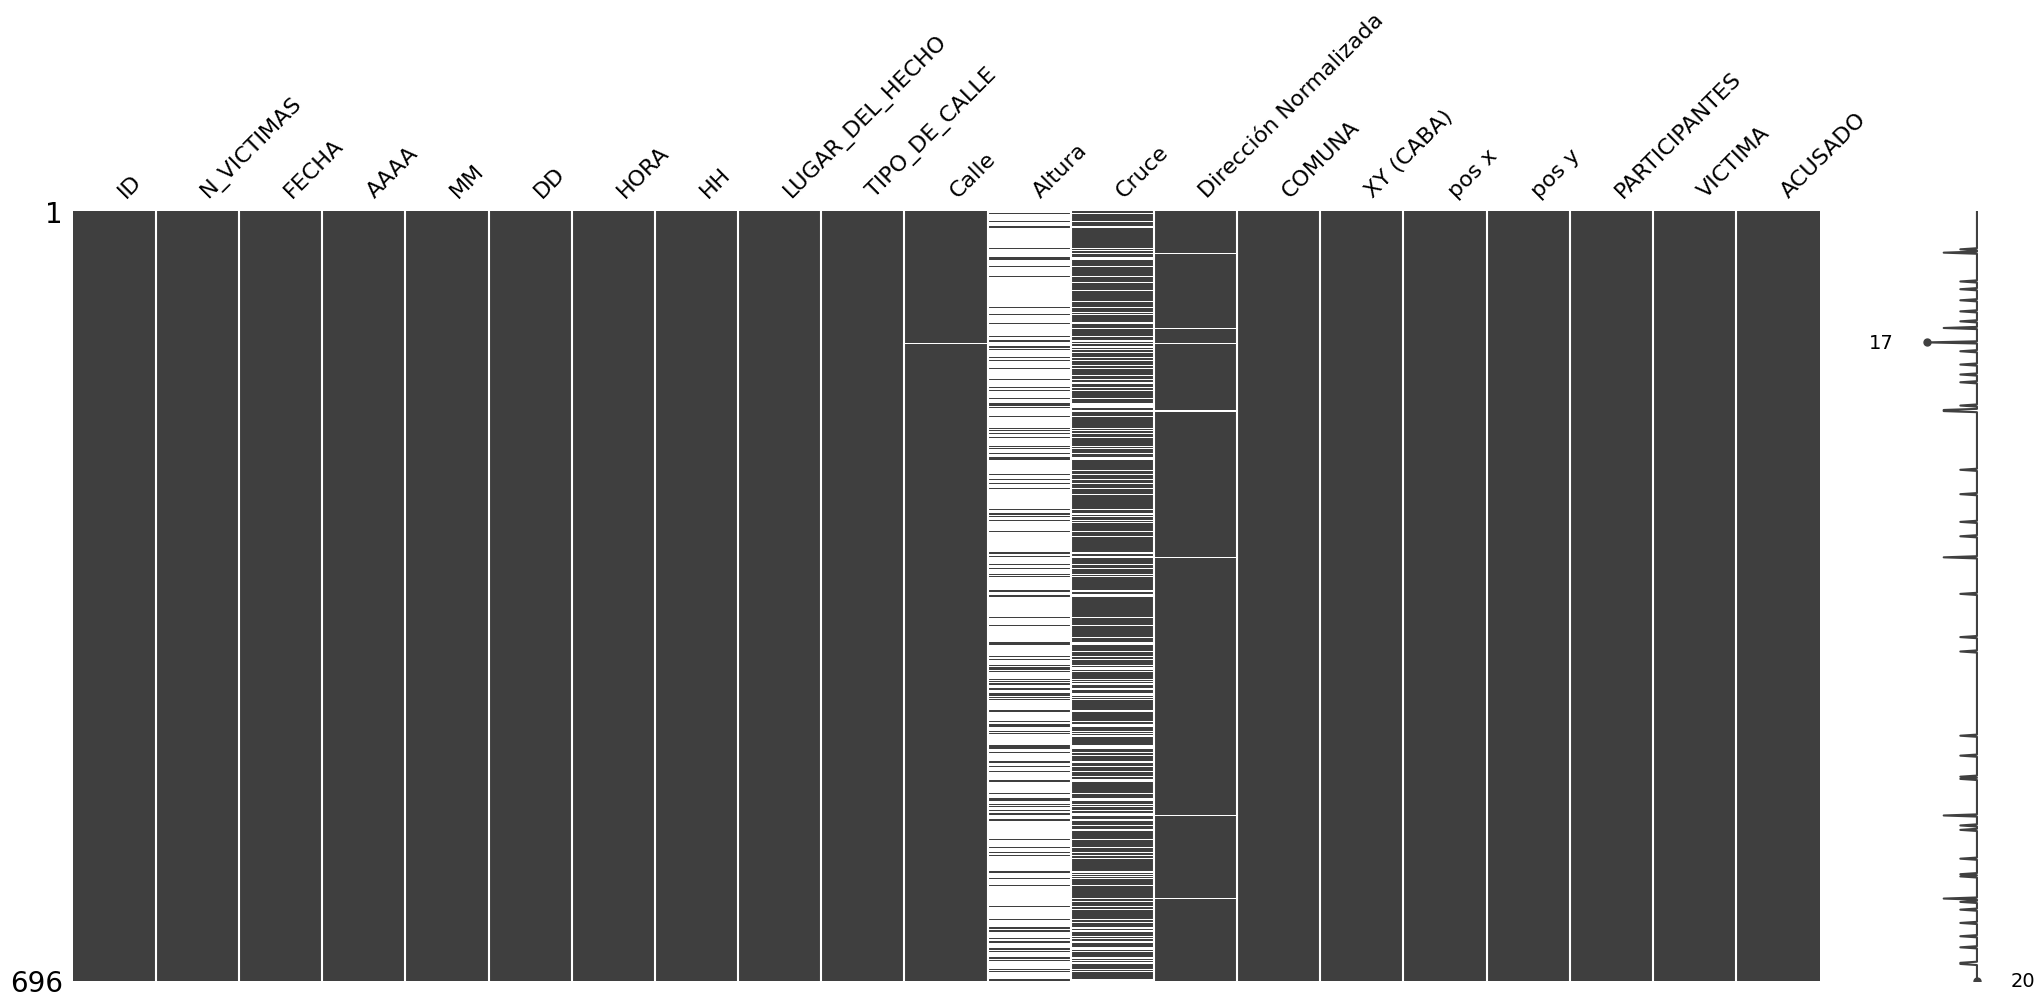

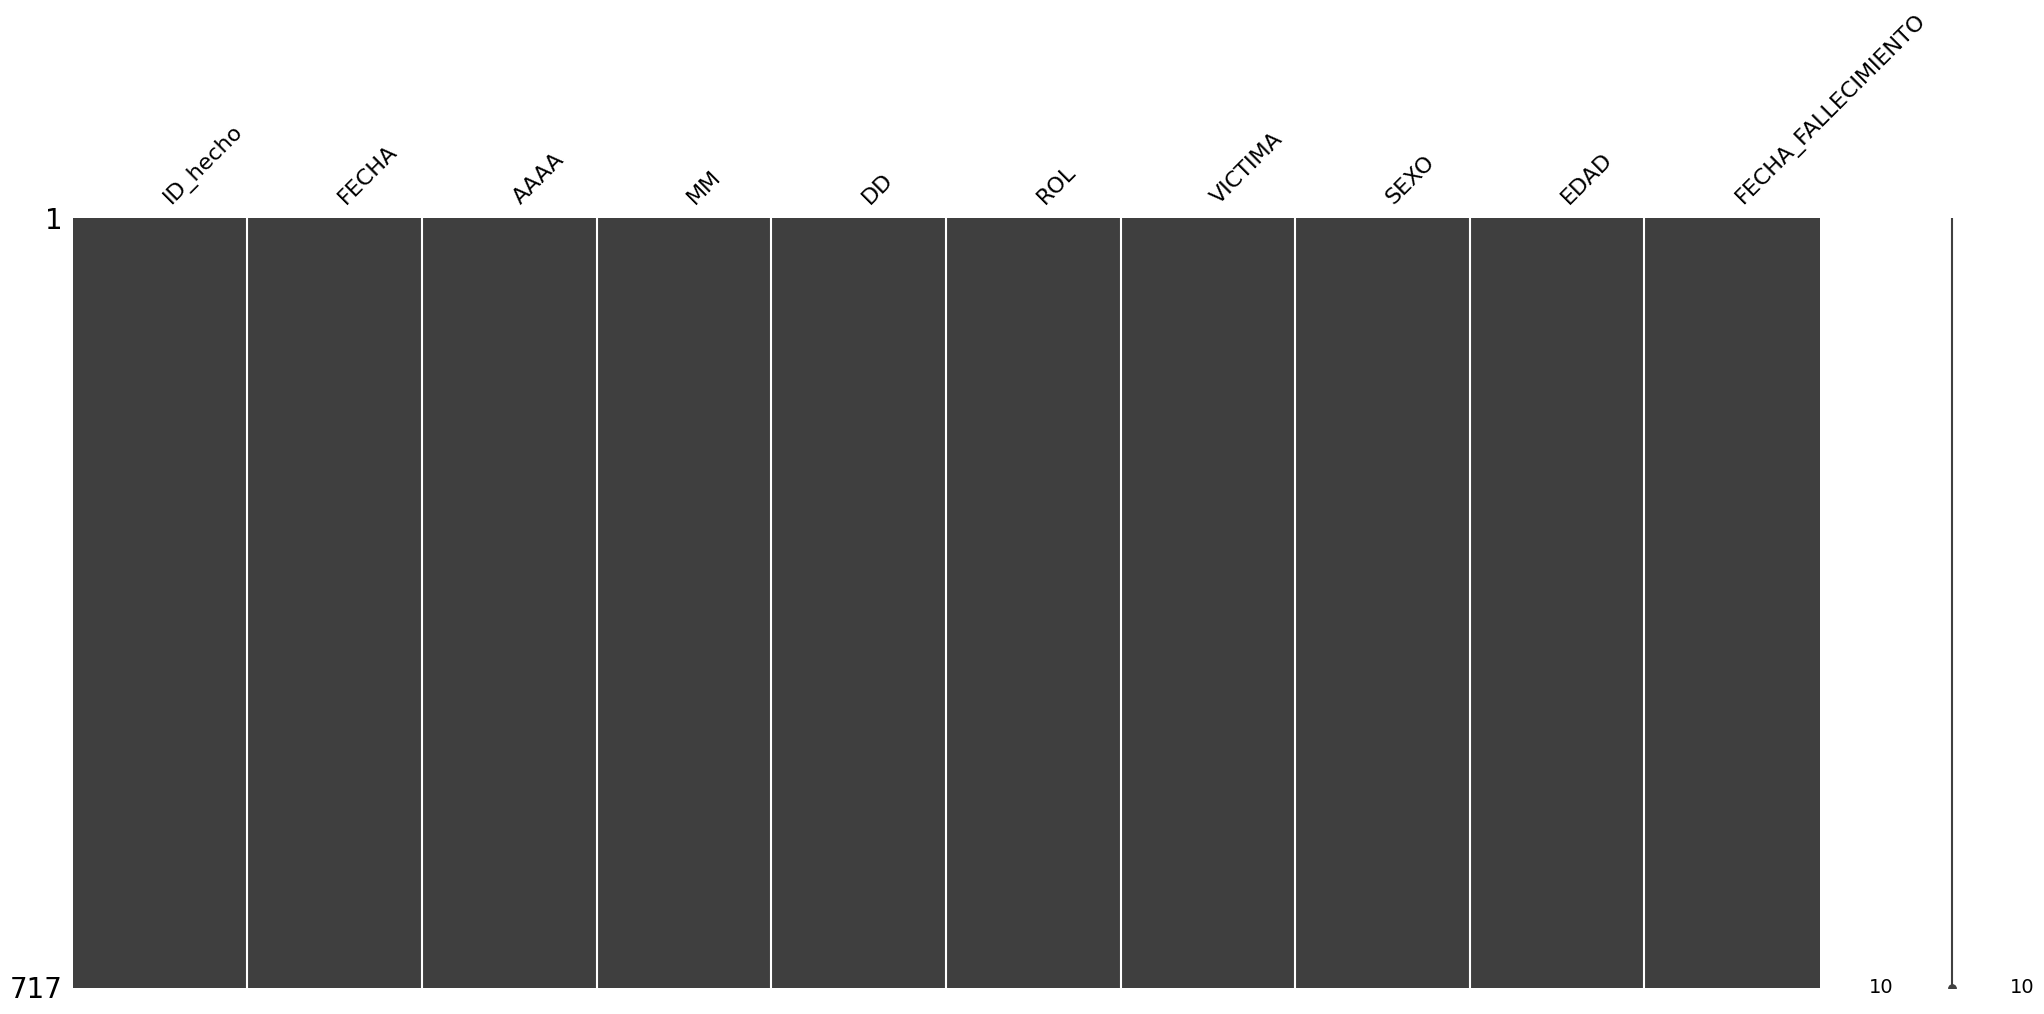

In [10]:
msno.matrix(homicidios_hechos)
plt.show()
msno.matrix(homicidios_victimas)
plt.show()

## Búsqueda de Valores Atípicos/Extremos (Outliers)
Analizamos la presencia de valores atípicos en el dataset utilizando diagramas de caja (boxplots).

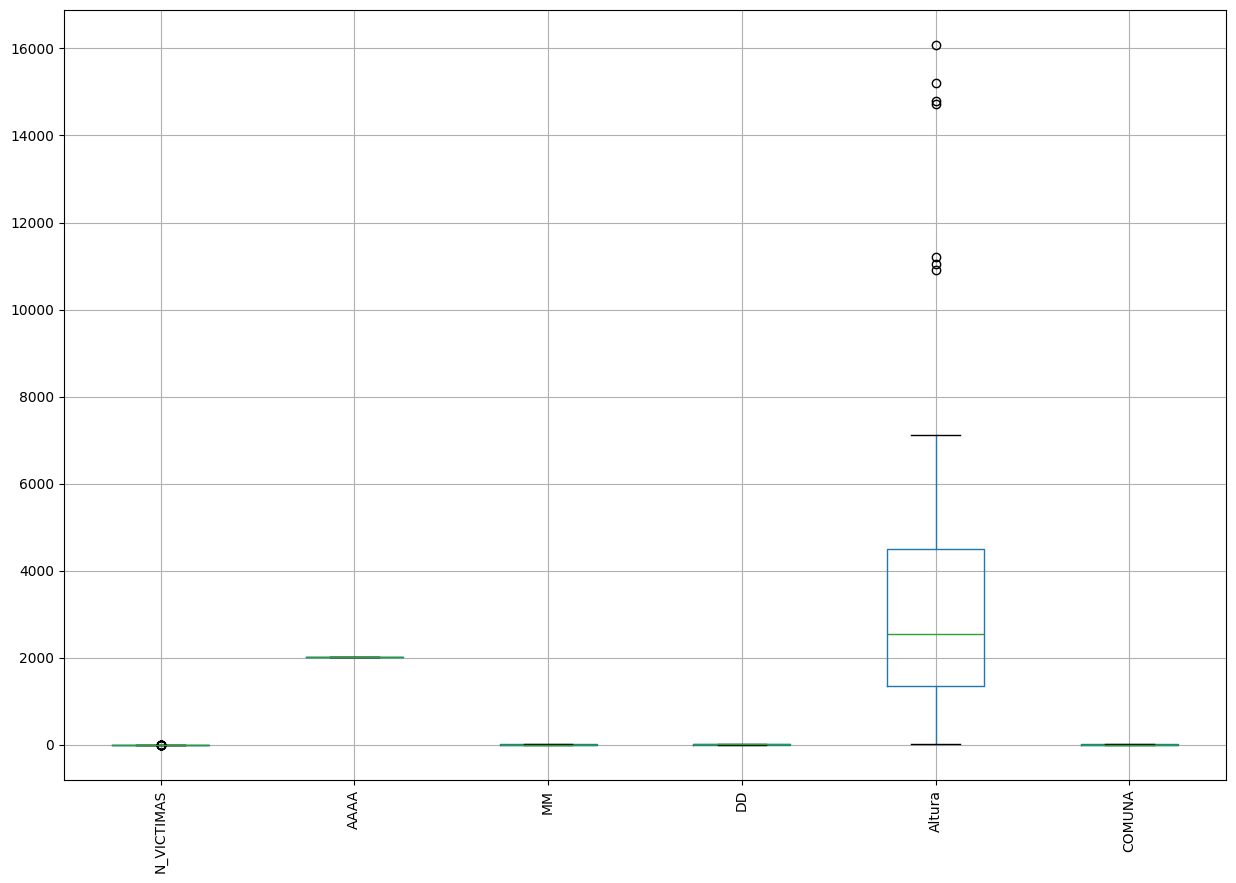

In [11]:
homicidios_hechos.boxplot(figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

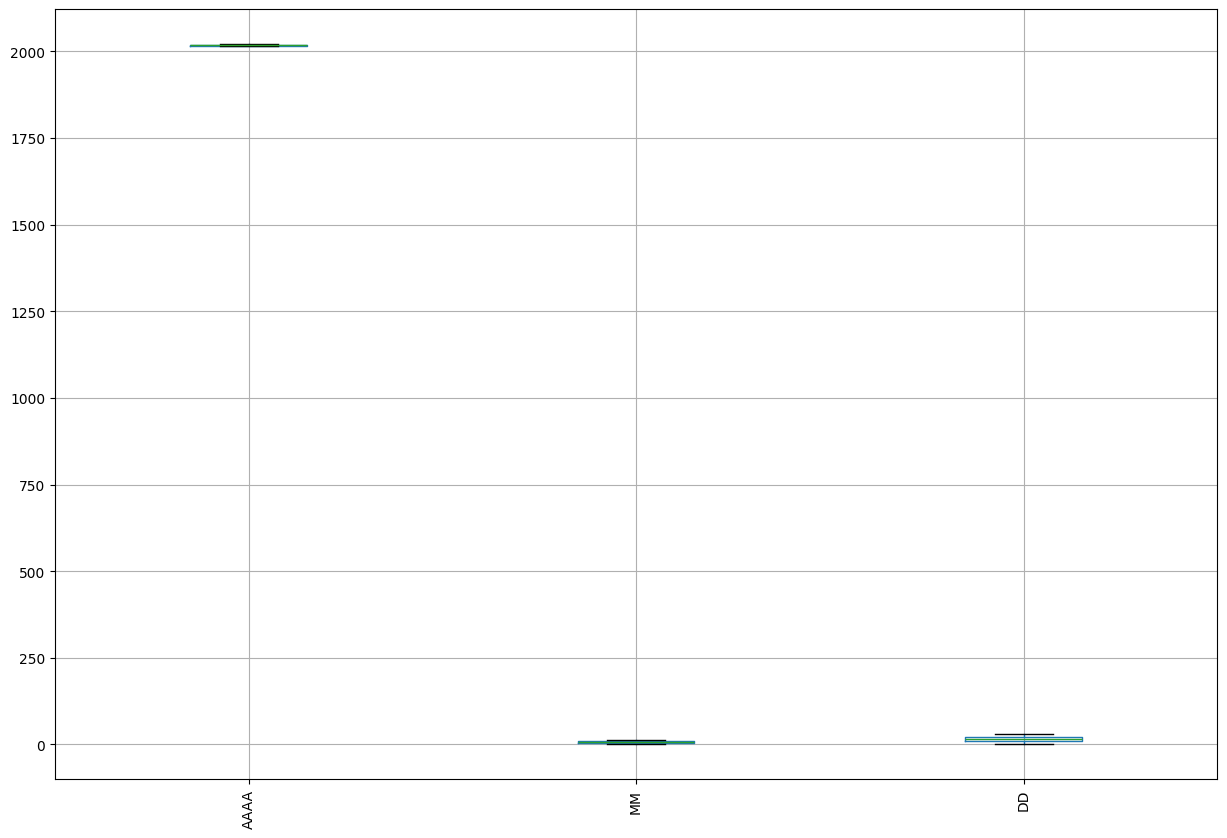

In [12]:
homicidios_victimas.boxplot(figsize=(15,10))
plt.xticks(rotation=90)
plt.show()

## Búsqueda de Registros Duplicados
Verificamos la existencia de registros duplicados en el dataset.

In [13]:
duplicate_hechos = homicidios_hechos[homicidios_hechos.duplicated()]
duplicate_victimas = homicidios_victimas[homicidios_victimas.duplicated()]
display(duplicate_hechos)
display(duplicate_victimas)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


## Estadísticas Descriptivas
Calculamos las estadísticas descriptivas para entender mejor la distribución de los datos.

In [14]:
display(homicidios_hechos.describe())
display(homicidios_victimas.describe())

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


## Análisis de Tendencias Temporales
Analizamos las tendencias temporales de los siniestros viales para identificar patrones a lo largo del tiempo.

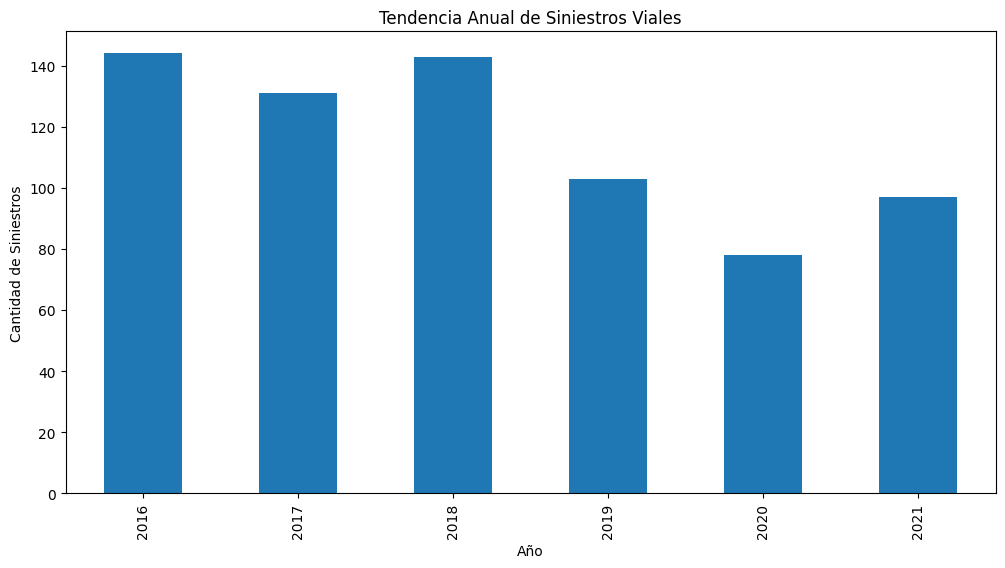

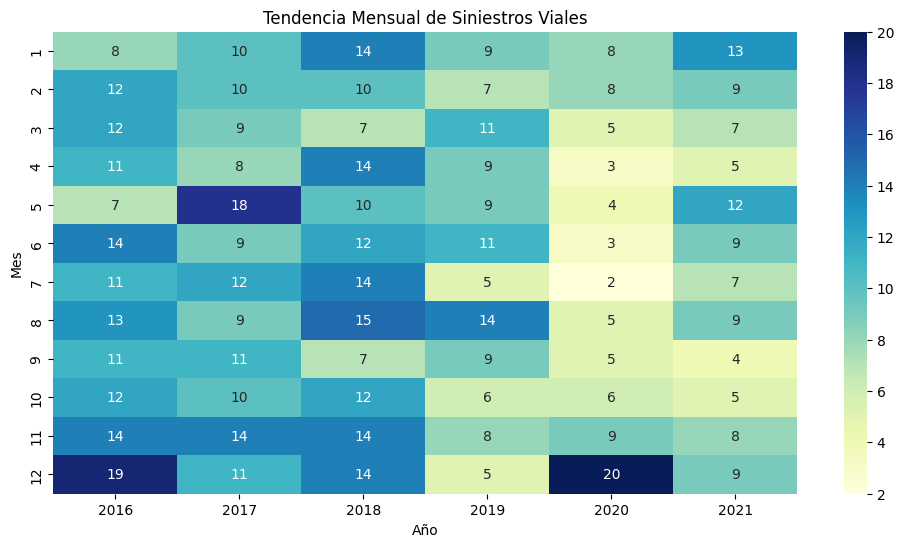

In [15]:
homicidios_hechos['FECHA'] = pd.to_datetime(homicidios_hechos['FECHA'])
homicidios_hechos['AÑO'] = homicidios_hechos['FECHA'].dt.year
homicidios_hechos['MES'] = homicidios_hechos['FECHA'].dt.month
annual_trend = homicidios_hechos.groupby('AÑO').size()
monthly_trend = homicidios_hechos.groupby(['AÑO', 'MES']).size().unstack().T
plt.figure(figsize=(12,6))
annual_trend.plot(kind='bar')
plt.title('Tendencia Anual de Siniestros Viales')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.show()
plt.figure(figsize=(12,6))
sns.heatmap(monthly_trend, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Tendencia Mensual de Siniestros Viales')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

## Análisis Geográfico de los Siniestros
Analizamos la distribución geográfica de los siniestros viales para identificar áreas de mayor riesgo.

In [24]:
# Convertir las columnas 'pos x' y 'pos y' a valores numéricos, manejando errores
homicidios_hechos['pos x'] = pd.to_numeric(homicidios_hechos['pos x'], errors='coerce')
homicidios_hechos['pos y'] = pd.to_numeric(homicidios_hechos['pos y'], errors='coerce')

# Filtrar los datos para mantener solo los puntos válidos
map_data = homicidios_hechos.dropna(subset=['pos x', 'pos y'])

# Crear el GeoDataFrame con geometría a partir de 'pos x' y 'pos y'
geometry = gpd.points_from_xy(map_data['pos x'], map_data['pos y'])
geo_df = gpd.GeoDataFrame(map_data, geometry=geometry)

In [25]:
# Definir explícitamente el CRS original de 'geo_df' (suponiendo que es WGS 84)
geo_df.set_crs(epsg=4326, inplace=True)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,AÑO,MES,geometry
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,2016,1,POINT (-58.47534 -34.68757)
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016,1,POINT (-58.50878 -34.66978)
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,2016,1,POINT (-58.39040 -34.63189)
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,2016,1,POINT (-58.46504 -34.68093)
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,2016,1,POINT (-58.38718 -34.62247)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,2021,12,POINT (-58.43354 -34.64562)
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,2021,12,POINT (-58.46740 -34.65118)
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,2021,12,POINT (-58.47293 -34.61985)
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,2021,12,POINT (-58.47067 -34.65022)


In [35]:
# Cargar el shapefile de la Ciudad de Buenos Aires desde un archivo zip
caba_shape = gpd.read_file('../Datasets/Shapefiles/comunas.zip')



In [36]:
caba_shape

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."
5,9,LIMITE COMUNAL,14.0,PALERMO,22126.531858,1.584587e+07,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
6,11,LIMITE COMUNAL,15.0,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,17832.585580,1.432290e+07,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5..."
7,15,LIMITE COMUNAL,13.0,BELGRANO - COLEGIALES - NUÑEZ,26198.826953,1.471321e+07,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5..."
8,13,LIMITE COMUNAL,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,35423.282799,2.168464e+07,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6..."
9,2,LIMITE COMUNAL,5.0,ALMAGRO - BOEDO,12323.432479,6.660603e+06,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6..."


In [37]:
# Reproyectar el GeoDataFrame de los siniestros viales al CRS del shapefile de CABA
geo_df = geo_df.to_crs(caba_shape.crs)

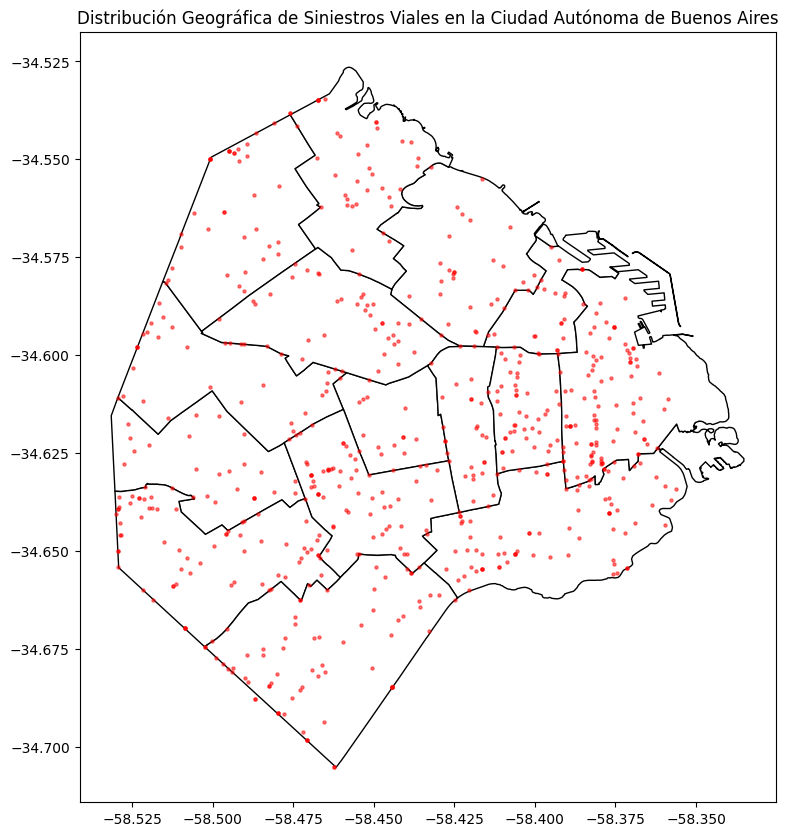

In [39]:
# Plotear el mapa de CABA con los siniestros viales
fig, ax = plt.subplots(figsize=(10, 10))
caba_shape.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, color='red', alpha=0.5, markersize=5)
plt.title('Distribución Geográfica de Siniestros Viales en la Ciudad Autónoma de Buenos Aires')
plt.show()

## Identificación de Patrones en los Participantes de los Accidentes
Analizamos los tipos de participantes involucrados en los accidentes para identificar patrones comunes.

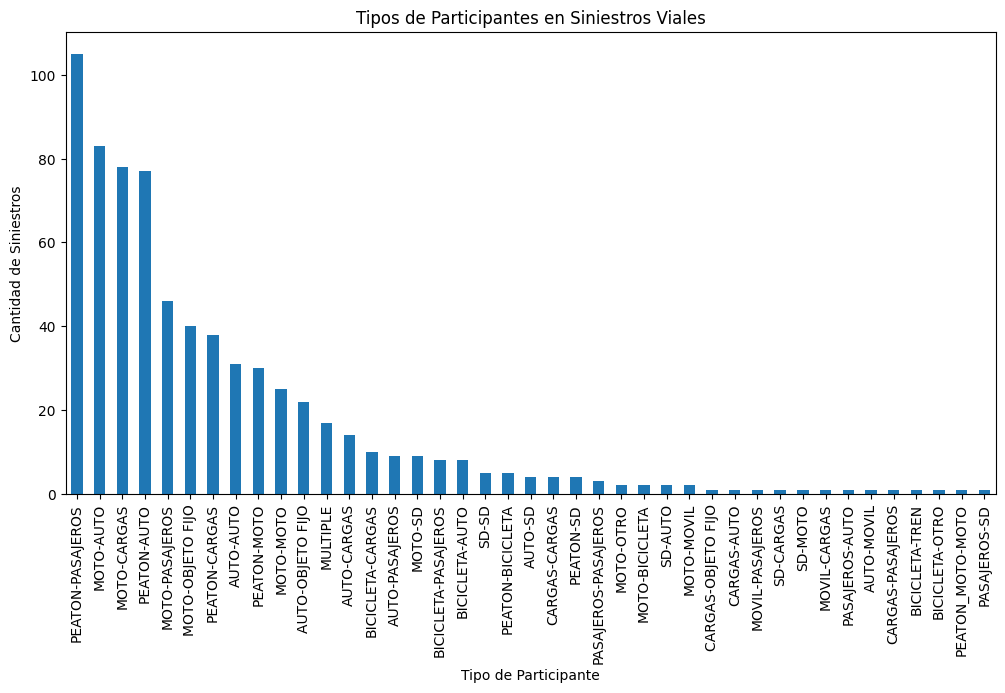

In [40]:
participant_counts = homicidios_hechos['PARTICIPANTES'].value_counts()
plt.figure(figsize=(12,6))
participant_counts.plot(kind='bar')
plt.title('Tipos de Participantes en Siniestros Viales')
plt.xlabel('Tipo de Participante')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Análisis de la Columna "VICTIMA"

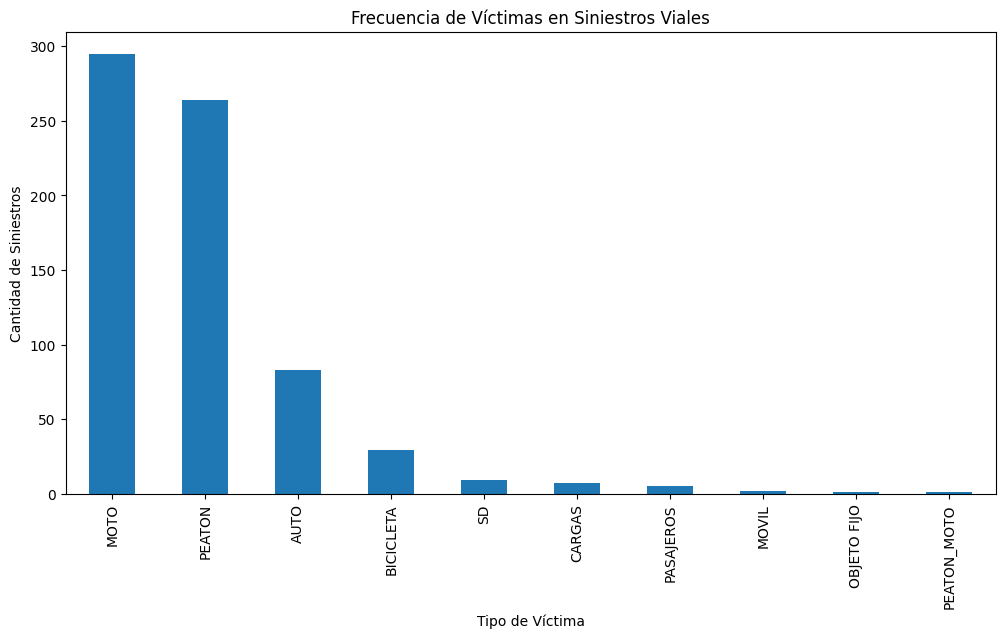

In [41]:
# Análisis de la columna "VICTIMA"
victima_counts = homicidios_hechos['VICTIMA'].value_counts()
plt.figure(figsize=(12, 6))
victima_counts.plot(kind='bar')
plt.title('Frecuencia de Víctimas en Siniestros Viales')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Siniestros')
plt.show()

Análisis de la Columna "ACUSADO"

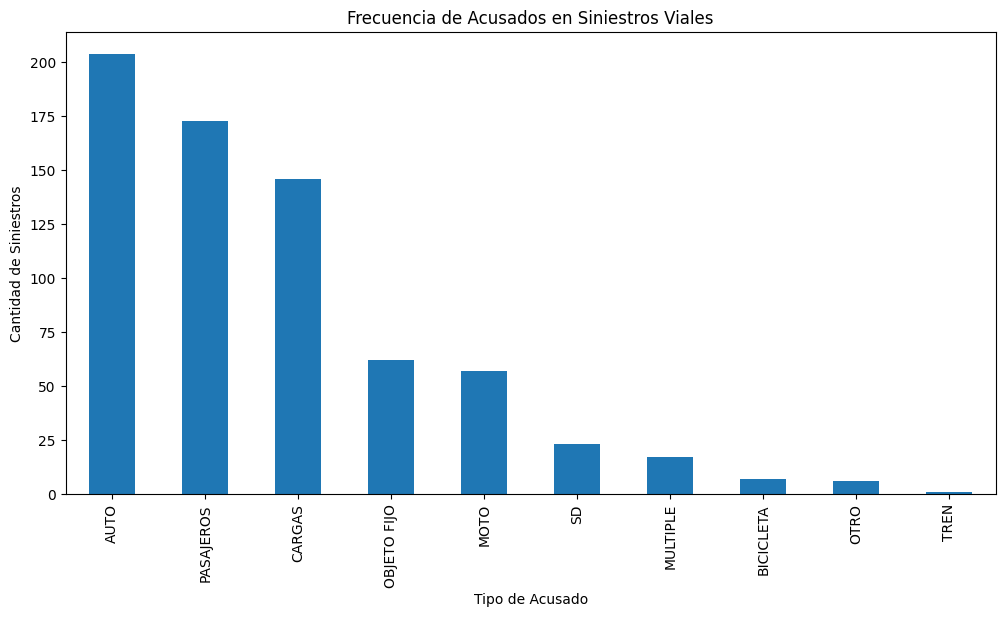

In [42]:
# Análisis de la columna "ACUSADO"
acusado_counts = homicidios_hechos['ACUSADO'].value_counts()
plt.figure(figsize=(12, 6))
acusado_counts.plot(kind='bar')
plt.title('Frecuencia de Acusados en Siniestros Viales')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Cantidad de Siniestros')
plt.show()


Relación entre "VICTIMA" y "ACUSADO"

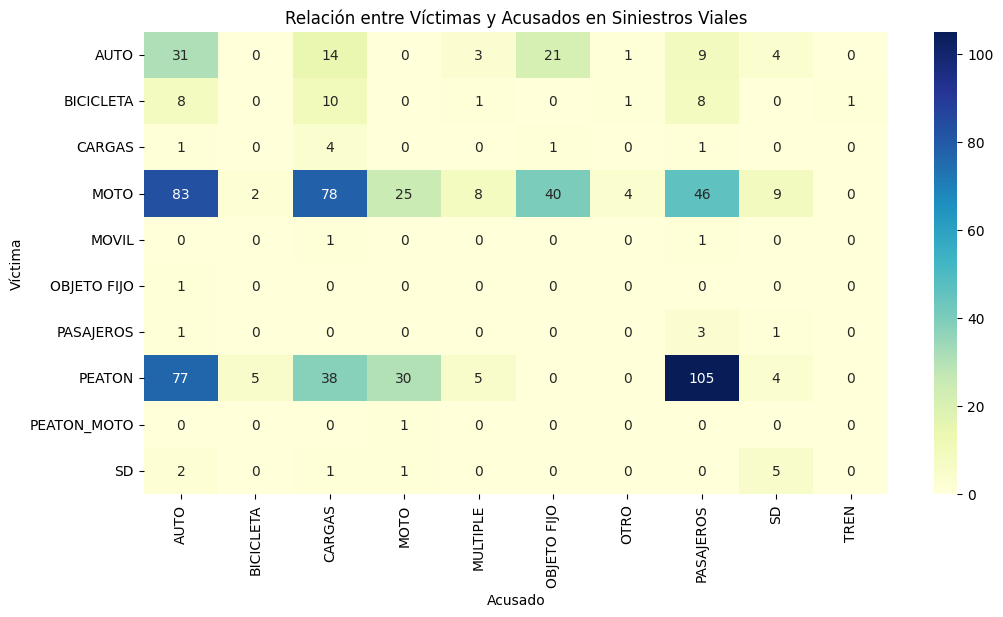

In [43]:
# Relación entre "VICTIMA" y "ACUSADO"
victima_acusado_pairs = homicidios_hechos.groupby(['VICTIMA', 'ACUSADO']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(victima_acusado_pairs, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Relación entre Víctimas y Acusados en Siniestros Viales')
plt.xlabel('Acusado')
plt.ylabel('Víctima')
plt.show()

Distribución por edad de las víctimas

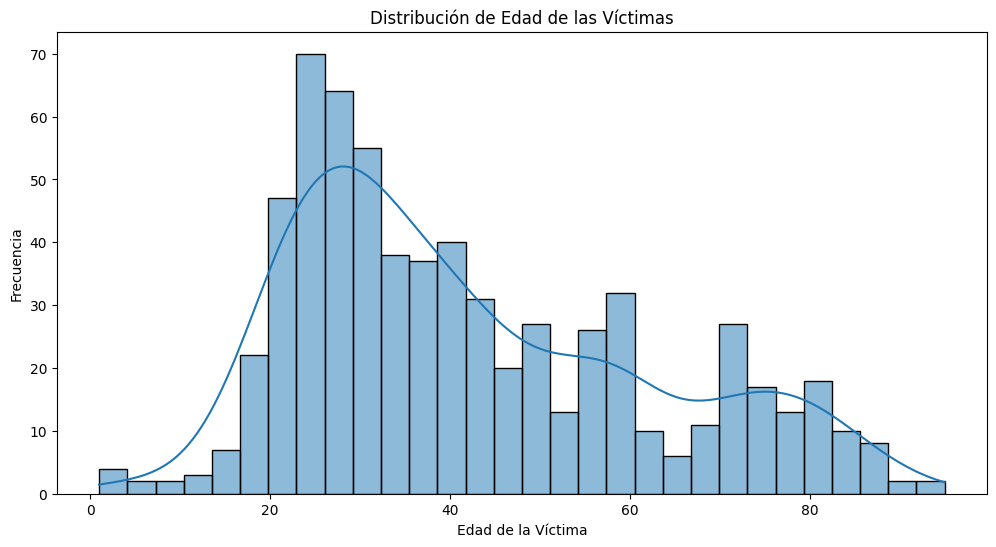

In [47]:
# Limpiar la columna EDAD
homicidios_victimas['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')

# Distribución por edad de las víctimas
plt.figure(figsize=(12, 6))
sns.histplot(homicidios_victimas['EDAD'], bins=30, kde=True)
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad de la Víctima')
plt.ylabel('Frecuencia')
plt.show()

Análisis de las víctimas por género

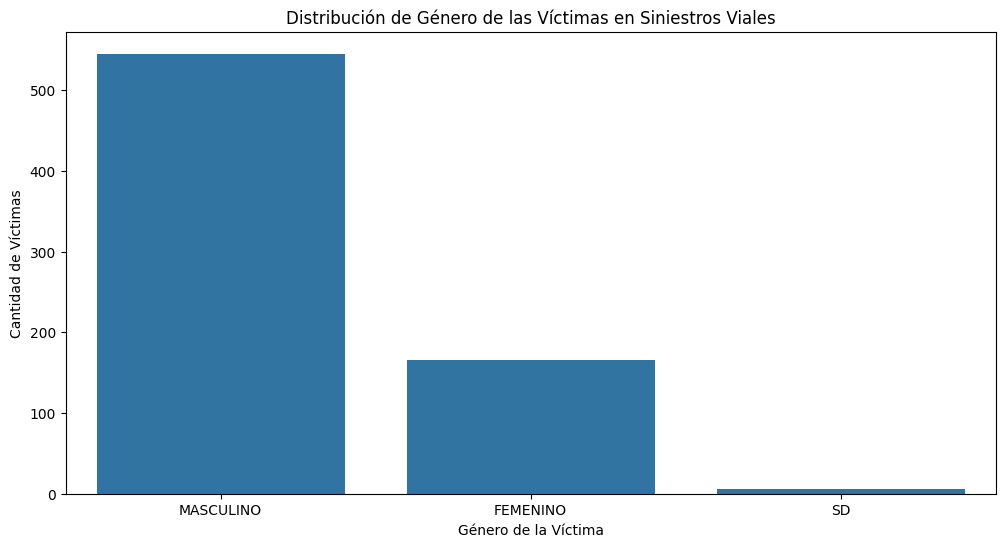

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=homicidios_victimas, x='SEXO', order=homicidios_victimas['SEXO'].value_counts().index)
plt.title('Distribución de Género de las Víctimas en Siniestros Viales')
plt.xlabel('Género de la Víctima')
plt.ylabel('Cantidad de Víctimas')
plt.show()

## CONCLUSIONES


1. **Descripción General del Dataset:**

El dataset contiene información detallada sobre los homicidios en siniestros viales, incluyendo datos de los hechos y las víctimas.


2. **Valores Faltantes:**

Se realizó una exploración para identificar valores faltantes en el dataset. El manejo de estos valores es crucial para garantizar la integridad del análisis.

En el dataset principal de siniestros viales, las columnas relacionadas con la ubicación del siniestro (como 'Altura', 'Cruce', 'Dirección_Normalizada') tienen valores faltantes significativos. Esto puede requerir atención en términos de limpieza de datos o imputación de valores faltantes.

En contraste, el dataset de detalles de víctimas está muy completo, sin valores faltantes notables, lo que facilita su análisis sin necesidad de realizar imputaciones o limpiezas extensivas.


3. **Valores Atípicos:**

Se analizaron los valores atípicos (outliers) utilizando diagramas de caja (boxplots), lo cual ayuda a identificar datos que se desvían significativamente de otros puntos.

HECHOS:

* La columna 'Altura' requiere una mayor atención debido a la presencia de valores atípicos significativos.

* Las otras columnas parecen estar bien distribuidas sin valores atípicos notables.

VICTIMAS:

* No se observan valores atípicos significativos en las columnas visualizadas ('AAAA', 'MM', 'DD').

* Las distribuciones son uniformes y estrechas, indicando datos consistentes.

4. **Registros Duplicados:**

Se verificó la existencia de registros duplicados en el dataset, lo que es importante para evitar sesgos en el análisis.

No se encontraron registros duplicados en ambos datasets (homicidios_hechos y homicidios_victimas).

Esto sugiere que los datos están bien mantenidos en términos de duplicación, lo que mejora la integridad y la confiabilidad del análisis.

5. **Estadísticas Descriptivas:**

Se calcularon estadísticas descriptivas para entender mejor la distribución de los datos y obtener insights iniciales sobre el dataset.

Ambas tablas muestran que los datos están distribuidos uniformemente a lo largo de los años, meses y días.

El número de víctimas por siniestro es generalmente bajo, con la mayoría de los siniestros teniendo una sola víctima.

La columna 'Altura' en el dataset homicidios_hechos tiene una alta variabilidad y muchos valores faltantes, lo que puede requerir mayor atención.

Las estadísticas descriptivas confirman la calidad y la consistencia de los datos, proporcionando una base sólida para análisis adicionales.

6. **Tendencias Temporales:**

Se analizaron las tendencias temporales de los siniestros viales, identificando patrones y cambios a lo largo del tiempo.

Gráfico de Barras (Tendencia Anual):

* Años 2016 y 2018: Se observa que los años 2016 y 2018 tienen la mayor cantidad de siniestros viales, con más de 140 incidentes reportados cada uno.

* Año 2020: Hay una notable disminución en la cantidad de siniestros viales en 2020, probablemente debido a las restricciones y la disminución del tráfico durante la pandemia de COVID-19.

* Año 2021: Aunque hay un ligero aumento respecto a 2020, el número de siniestros sigue siendo menor comparado con años anteriores como 2016, 2017 y 2018.

Mapa de Calor (Tendencia Mensual):

* Meses con Mayor Incidencia:
Mayo 2017: Destaca como el mes con mayor cantidad de siniestros en un solo mes (18 incidentes).
Diciembre 2020: También muestra un número elevado de siniestros (20 incidentes), probablemente debido a las festividades y el aumento del tráfico.

* Meses con Menor Incidencia: Los meses como enero, febrero y julio tienen, en general, una menor cantidad de siniestros.

7. **Análisis Geográfico:**

Se realizó un análisis geográfico de los siniestros viales para identificar áreas con mayor incidencia de accidentes, lo cual puede ser útil para implementar medidas de seguridad vial en zonas críticas.

* Distribución General:

Los siniestros viales están distribuidos a lo largo de toda la ciudad, sin una concentración excesiva en un área específica. Esto sugiere que los accidentes de tránsito son un problema generalizado que afecta a múltiples áreas de la ciudad, no solo a ciertas zonas.

* Áreas de Mayor Incidencia:

Se pueden observar ciertas áreas con una mayor densidad de puntos rojos, lo que indica una mayor frecuencia de siniestros viales. Estas áreas pueden ser puntos críticos que requieren atención especial. Por ejemplo, se nota una mayor concentración de siniestros en el centro y algunas zonas del norte y noroeste de la ciudad.

* Áreas de Menor Incidencia:

Algunas áreas, especialmente en la periferia de la ciudad, muestran una menor concentración de puntos rojos. Esto podría deberse a una menor densidad de tráfico o a una infraestructura vial más segura.

8. **Patrones en los Participantes de los Accidentes:**

Se identificaron patrones en los tipos de participantes involucrados en los accidentes, lo que puede ayudar a entender mejor las dinámicas de los siniestros viales.

* Peatón/Pasajero: Es el tipo de participante más común en los siniestros viales, con más de 100 incidentes reportados. Esto indica que los peatones y pasajeros son los más vulnerables en los accidentes de tráfico.

* Motos: Las categorías de motos (MOTO, MOTO-CARGA, MOTO-OBRERO, MOTO-PASAJEROS) son también comunes en los siniestros, destacando la alta participación de motos en los accidentes.

* Los tipos de participantes como vehículos escolares (ESCOLAR), vehículos de emergencia (EMERGENCIA), y otros tipos menos comunes muestran una menor cantidad de siniestros.

9. **Relación entre Víctima y Acusado:**

Se exploraron las relaciones entre las características de las víctimas y los acusados, proporcionando una visión más completa de los incidentes.

Frecuencia de Víctimas en Siniestros Viales:

* MOTO: Las víctimas más frecuentes en siniestros viales son los motociclistas, con casi 300 incidentes
* PEATÓN: Los peatones son el segundo grupo más afectado, con una cantidad ligeramente inferior a la de los motociclistas.
* AUTO: Los ocupantes de autos también representan una cantidad significativa de víctimas, aunque menor comparada con motos y peatones.
* Otros Grupos: Bicicletas, cargas, pasajeros y otros tipos de víctimas muestran una menor frecuencia en los siniestros viales.

Frecuencia de Acusados en Siniestros Viales:

* AUTO: Los autos son los más frecuentemente acusados en siniestros viales, con más de 200 incidentes.
* PASAJEROS: Los pasajeros también tienen una alta frecuencia como acusados.
* CARGAS: Vehículos de carga son otro grupo notablemente involucrado como acusados.
* MOTO: Las motos también aparecen como acusados, aunque en menor cantidad comparada con autos y pasajeros.
* Otros Grupos: Objetos fijos, bicicletas y trenes muestran una menor frecuencia como acusados.

Relación entre Víctimas y Acusados en Siniestros Viales (Mapa de Calor):

* MOTO como Víctima y Acusado: La relación entre motos como víctimas y acusados es significativa, mostrando un número alto de incidentes (78 casos).
* PEATÓN como Víctima y Acusado: Los peatones tienen una alta incidencia como víctimas cuando los acusados son pasajeros (105 casos).
* AUTO como Víctima: Los autos como víctimas también muestran un alto número de incidentes con autos como acusados (31 casos).

10. **Análisis de Víctimas:**

Se realizaron análisis específicos sobre las víctimas en los siniestros, incluyendo distribuciones por edad y género.

La mayor frecuencia de víctimas se encuentra en el grupo de edad de 15 a 25 años, con un pico alrededor de los 20 años. Esto sugiere que los jóvenes son los más afectados por los siniestros viales.

La mayoría de las víctimas de siniestros viales son hombres, con más de 500 incidentes reportados. Esto sugiere que los hombres son significativamente más propensos a estar involucrados en siniestros viales.